In [1]:
import os
import time
import random
import pickle
import warnings
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader

from utils import *
from models import ConvLSTM

In [2]:
# ignore warning message
warnings.filterwarnings('ignore')

# fix seed
os.environ['PYTHONHASHSEED'] = str(42)
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [3]:
if torch.cuda.is_available():
    print(f'GPU count: {torch.cuda.device_count()}')
    for i in range(torch.cuda.device_count()):
        print(f'GPU {i}: {torch.cuda.get_device_name(i)}')
        print(torch.cuda.get_device_properties(i))
else:
    print('No GPU')

GPU count: 2
GPU 0: NVIDIA A100-SXM4-40GB
_CudaDeviceProperties(name='NVIDIA A100-SXM4-40GB', major=8, minor=0, total_memory=40337MB, multi_processor_count=108)
GPU 1: NVIDIA A100-SXM4-40GB
_CudaDeviceProperties(name='NVIDIA A100-SXM4-40GB', major=8, minor=0, total_memory=40337MB, multi_processor_count=108)


In [4]:
# data : 2017~2021년 5월 31일까지의 전력 사용량 데이터
# train : 2017~2019년 3년동안의 전력 사용량 데이터(3년)
# val : 2020년 1년동안의 전력 사용량 데이터(1년)
# test : 2021년 5월 31일 6개월 동안의 전력 사용량 데이터(6개월)
elec = np.expand_dims(np.load('./dataset/2d_elec.npy'), axis=1)
elec_x, elec_y, elec_val = make_sequential(elec)

train_X = elec_x[:(365*24*3)]
train_y = elec_y[:(365*24*3)]

val_X = elec_x[(365*24*3):(365*24*4)]
val_y = elec_y[(365*24*3):(365*24*4)]

test_X = elec_x[(365*24*4):]
test_y = elec_y[(365*24*4):]

In [5]:
train_dataset = CustomDataset(train_X, train_y)
train_loader = DataLoader(train_dataset, 64, pin_memory=True)

val_dataset = CustomDataset(val_X, val_y)
val_loader = DataLoader(val_dataset, 64, pin_memory=True)

test_dataset = CustomDataset(test_X, test_y)
test_loader = DataLoader(test_dataset, 64, pin_memory=True)

In [6]:
print(f'train_size: {len(train_dataset)}')
print(train_dataset.X.shape)
print(train_dataset.Y.shape)

print(f'val_size: {len(val_dataset)}')
print(val_dataset.X.shape)
print(val_dataset.Y.shape)

print(f'test_size: {len(test_dataset)}')
print(test_dataset.X.shape)
print(test_dataset.Y.shape)

train_size: 26280
(26280, 24, 1, 8, 20)
(26280, 24, 1, 8, 20)
val_size: 8760
(8760, 24, 1, 8, 20)
(8760, 24, 1, 8, 20)
test_size: 3577
(3577, 24, 1, 8, 20)
(3577, 24, 1, 8, 20)


In [7]:
X, _ = next(iter(train_loader))

path = './save_model/ConvLSTM/'
check_path(path)
model = ConvLSTM(num_layers=3, num_hidden=[128,128,128], shape=X.shape[1:], kernel_size=5, stride=1)

In [8]:
optimizer = torch.optim.AdamW(model.parameters(), lr=.001)
criterion = nn.MSELoss()
epochs = 100
# gpu 0 사용
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_loss, val_loss = train(model, optimizer, criterion, epochs, train_loader, val_loader, device, path=path+'best_ConvLSTM')

100%|██████████| 137/137 [00:10<00:00, 12.61it/s]


Epoch [1/100] 133.93s
loss: 0.0070 | val_loss: 0.0063


100%|██████████| 137/137 [00:11<00:00, 12.06it/s]


Epoch [2/100] 132.42s
loss: 0.0050 | val_loss: 0.0060


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch [3/100] 131.75s
loss: 0.0050 | val_loss: 0.0059


100%|██████████| 137/137 [00:10<00:00, 12.54it/s]


Epoch [4/100] 132.15s
loss: 0.0050 | val_loss: 0.0057


100%|██████████| 137/137 [00:10<00:00, 12.62it/s]


Epoch [5/100] 131.98s
loss: 0.0049 | val_loss: 0.0059


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch [6/100] 132.11s
loss: 0.0043 | val_loss: 0.0068


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch [7/100] 132.02s
loss: 0.0040 | val_loss: 0.0062


100%|██████████| 137/137 [00:10<00:00, 12.64it/s]


Epoch [8/100] 132.13s
loss: 0.0037 | val_loss: 0.0059


100%|██████████| 137/137 [00:10<00:00, 12.60it/s]


Epoch [9/100] 131.94s
loss: 0.0036 | val_loss: 0.0056


100%|██████████| 137/137 [00:10<00:00, 12.63it/s]


Epoch [10/100] 131.93s
loss: 0.0035 | val_loss: 0.0054


100%|██████████| 137/137 [00:10<00:00, 12.67it/s]


Epoch [11/100] 131.92s
loss: 0.0035 | val_loss: 0.0055


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch [12/100] 132.06s
loss: 0.0035 | val_loss: 0.0055


100%|██████████| 137/137 [00:10<00:00, 12.60it/s]


Epoch [13/100] 131.90s
loss: 0.0035 | val_loss: 0.0051


100%|██████████| 137/137 [00:10<00:00, 12.64it/s]


Epoch [14/100] 132.02s
loss: 0.0035 | val_loss: 0.0051


100%|██████████| 137/137 [00:10<00:00, 12.61it/s]


Epoch [15/100] 131.85s
loss: 0.0035 | val_loss: 0.0051


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch [16/100] 132.29s
loss: 0.0035 | val_loss: 0.0055


100%|██████████| 137/137 [00:10<00:00, 12.61it/s]


Epoch [17/100] 131.94s
loss: 0.0034 | val_loss: 0.0050


100%|██████████| 137/137 [00:10<00:00, 12.60it/s]


Epoch [18/100] 132.01s
loss: 0.0035 | val_loss: 0.0054


100%|██████████| 137/137 [00:10<00:00, 12.55it/s]


Epoch [19/100] 131.87s
loss: 0.0035 | val_loss: 0.0052


100%|██████████| 137/137 [00:10<00:00, 12.64it/s]


Epoch [20/100] 132.10s
loss: 0.0035 | val_loss: 0.0053


100%|██████████| 137/137 [00:11<00:00, 12.33it/s]


Epoch [21/100] 131.97s
loss: 0.0034 | val_loss: 0.0053


100%|██████████| 137/137 [00:10<00:00, 12.61it/s]


Epoch [22/100] 132.03s
loss: 0.0034 | val_loss: 0.0053


100%|██████████| 137/137 [00:11<00:00, 11.79it/s]


Epoch [23/100] 132.75s
loss: 0.0034 | val_loss: 0.0052


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch [24/100] 131.91s
loss: 0.0034 | val_loss: 0.0052


100%|██████████| 137/137 [00:11<00:00, 12.12it/s]


Epoch [25/100] 132.27s
loss: 0.0034 | val_loss: 0.0050


100%|██████████| 137/137 [00:10<00:00, 12.65it/s]


Epoch [26/100] 131.78s
loss: 0.0034 | val_loss: 0.0050


100%|██████████| 137/137 [00:10<00:00, 12.63it/s]


Epoch [27/100] 131.91s
loss: 0.0034 | val_loss: 0.0052


100%|██████████| 137/137 [00:10<00:00, 12.61it/s]


Epoch [28/100] 131.80s
loss: 0.0034 | val_loss: 0.0052


100%|██████████| 137/137 [00:10<00:00, 12.56it/s]


Epoch [29/100] 132.03s
loss: 0.0034 | val_loss: 0.0048


100%|██████████| 137/137 [00:10<00:00, 12.63it/s]


Epoch [30/100] 131.82s
loss: 0.0034 | val_loss: 0.0047


100%|██████████| 137/137 [00:10<00:00, 12.66it/s]


Epoch [31/100] 132.04s
loss: 0.0034 | val_loss: 0.0049


100%|██████████| 137/137 [00:10<00:00, 12.59it/s]


Epoch [32/100] 132.07s
loss: 0.0034 | val_loss: 0.0046


100%|██████████| 137/137 [00:10<00:00, 12.55it/s]


Epoch [33/100] 132.17s
loss: 0.0034 | val_loss: 0.0044


100%|██████████| 137/137 [00:10<00:00, 12.56it/s]


Epoch [34/100] 132.04s
loss: 0.0034 | val_loss: 0.0047


100%|██████████| 137/137 [00:10<00:00, 12.60it/s]


Epoch [35/100] 132.19s
loss: 0.0034 | val_loss: 0.0045


100%|██████████| 137/137 [00:10<00:00, 12.60it/s]


Epoch [36/100] 132.00s
loss: 0.0034 | val_loss: 0.0048


100%|██████████| 137/137 [00:10<00:00, 12.65it/s]


Epoch [37/100] 132.15s
loss: 0.0034 | val_loss: 0.0042


100%|██████████| 137/137 [00:10<00:00, 12.66it/s]


Epoch [38/100] 132.00s
loss: 0.0035 | val_loss: 0.0042


100%|██████████| 137/137 [00:10<00:00, 12.59it/s]


Epoch [39/100] 132.02s
loss: 0.0035 | val_loss: 0.0043


100%|██████████| 137/137 [00:10<00:00, 12.64it/s]


Epoch [40/100] 131.76s
loss: 0.0034 | val_loss: 0.0043


100%|██████████| 137/137 [00:10<00:00, 12.63it/s]


Epoch [41/100] 131.81s
loss: 0.0034 | val_loss: 0.0045


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch [42/100] 131.81s
loss: 0.0034 | val_loss: 0.0048


100%|██████████| 137/137 [00:10<00:00, 12.60it/s]


Epoch [43/100] 131.89s
loss: 0.0034 | val_loss: 0.0042


100%|██████████| 137/137 [00:11<00:00, 12.29it/s]


Epoch [44/100] 132.09s
loss: 0.0034 | val_loss: 0.0041


100%|██████████| 137/137 [00:10<00:00, 12.60it/s]


Epoch [45/100] 132.05s
loss: 0.0034 | val_loss: 0.0041


100%|██████████| 137/137 [00:11<00:00, 11.84it/s]


Epoch [46/100] 132.53s
loss: 0.0034 | val_loss: 0.0042


100%|██████████| 137/137 [00:10<00:00, 12.57it/s]


Epoch [47/100] 131.89s
loss: 0.0034 | val_loss: 0.0040


100%|██████████| 137/137 [00:11<00:00, 12.09it/s]


Epoch [48/100] 132.37s
loss: 0.0034 | val_loss: 0.0042


100%|██████████| 137/137 [00:10<00:00, 12.55it/s]


Epoch [49/100] 131.92s
loss: 0.0034 | val_loss: 0.0043


100%|██████████| 137/137 [00:10<00:00, 12.60it/s]


Epoch [50/100] 132.08s
loss: 0.0034 | val_loss: 0.0040


100%|██████████| 137/137 [00:10<00:00, 12.66it/s]


Epoch [51/100] 131.83s
loss: 0.0034 | val_loss: 0.0041


100%|██████████| 137/137 [00:10<00:00, 12.61it/s]


Epoch [52/100] 132.19s
loss: 0.0034 | val_loss: 0.0040


100%|██████████| 137/137 [00:10<00:00, 12.60it/s]


Epoch [53/100] 131.88s
loss: 0.0034 | val_loss: 0.0041


100%|██████████| 137/137 [00:10<00:00, 12.62it/s]


Epoch [54/100] 132.02s
loss: 0.0034 | val_loss: 0.0041


100%|██████████| 137/137 [00:10<00:00, 12.63it/s]


Epoch [55/100] 131.89s
loss: 0.0034 | val_loss: 0.0039


100%|██████████| 137/137 [00:10<00:00, 12.62it/s]


Epoch [56/100] 132.09s
loss: 0.0034 | val_loss: 0.0041


100%|██████████| 137/137 [00:10<00:00, 12.64it/s]


Epoch [57/100] 132.06s
loss: 0.0034 | val_loss: 0.0040


100%|██████████| 137/137 [00:10<00:00, 12.59it/s]


Epoch [58/100] 132.02s
loss: 0.0034 | val_loss: 0.0040


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch [59/100] 131.96s
loss: 0.0033 | val_loss: 0.0040


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch [60/100] 132.19s
loss: 0.0033 | val_loss: 0.0041


100%|██████████| 137/137 [00:10<00:00, 12.65it/s]


Epoch [61/100] 131.84s
loss: 0.0033 | val_loss: 0.0042


100%|██████████| 137/137 [00:10<00:00, 12.64it/s]


Epoch [62/100] 131.96s
loss: 0.0033 | val_loss: 0.0041


100%|██████████| 137/137 [00:10<00:00, 12.56it/s]


Epoch [63/100] 131.97s
loss: 0.0033 | val_loss: 0.0040


100%|██████████| 137/137 [00:10<00:00, 12.61it/s]


Epoch [64/100] 132.04s
loss: 0.0033 | val_loss: 0.0039


100%|██████████| 137/137 [00:10<00:00, 12.62it/s]


Epoch [65/100] 131.85s
loss: 0.0033 | val_loss: 0.0038


100%|██████████| 137/137 [00:10<00:00, 12.64it/s]


Epoch [66/100] 131.90s
loss: 0.0033 | val_loss: 0.0038


100%|██████████| 137/137 [00:11<00:00, 12.08it/s]


Epoch [67/100] 132.43s
loss: 0.0033 | val_loss: 0.0038


100%|██████████| 137/137 [00:10<00:00, 12.60it/s]


Epoch [68/100] 132.05s
loss: 0.0033 | val_loss: 0.0037


100%|██████████| 137/137 [00:11<00:00, 11.71it/s]


Epoch [69/100] 132.71s
loss: 0.0033 | val_loss: 0.0040


100%|██████████| 137/137 [00:10<00:00, 12.60it/s]


Epoch [70/100] 131.89s
loss: 0.0033 | val_loss: 0.0041


100%|██████████| 137/137 [00:11<00:00, 12.39it/s]


Epoch [71/100] 132.20s
loss: 0.0033 | val_loss: 0.0041


100%|██████████| 137/137 [00:10<00:00, 12.62it/s]


Epoch [72/100] 131.88s
loss: 0.0032 | val_loss: 0.0040


100%|██████████| 137/137 [00:10<00:00, 12.61it/s]


Epoch [73/100] 132.01s
loss: 0.0033 | val_loss: 0.0041


100%|██████████| 137/137 [00:10<00:00, 12.55it/s]


Epoch [74/100] 131.89s
loss: 0.0032 | val_loss: 0.0039


100%|██████████| 137/137 [00:10<00:00, 12.61it/s]


Epoch [75/100] 132.05s
loss: 0.0032 | val_loss: 0.0039


100%|██████████| 137/137 [00:10<00:00, 12.57it/s]


Epoch [76/100] 131.82s
loss: 0.0032 | val_loss: 0.0038


100%|██████████| 137/137 [00:10<00:00, 12.66it/s]


Epoch [77/100] 131.98s
loss: 0.0032 | val_loss: 0.0040


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch [78/100] 131.88s
loss: 0.0032 | val_loss: 0.0038


100%|██████████| 137/137 [00:10<00:00, 12.57it/s]


Epoch [79/100] 132.15s
loss: 0.0032 | val_loss: 0.0038


100%|██████████| 137/137 [00:10<00:00, 12.57it/s]


Epoch [80/100] 131.87s
loss: 0.0032 | val_loss: 0.0037


100%|██████████| 137/137 [00:10<00:00, 12.61it/s]


Epoch [81/100] 132.01s
loss: 0.0032 | val_loss: 0.0037


100%|██████████| 137/137 [00:10<00:00, 12.65it/s]


Epoch [82/100] 131.91s
loss: 0.0032 | val_loss: 0.0038


100%|██████████| 137/137 [00:10<00:00, 12.61it/s]


Epoch [83/100] 132.08s
loss: 0.0032 | val_loss: 0.0037


100%|██████████| 137/137 [00:10<00:00, 12.63it/s]


Epoch [84/100] 131.85s
loss: 0.0031 | val_loss: 0.0037


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch [85/100] 132.10s
loss: 0.0031 | val_loss: 0.0037


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch [86/100] 131.90s
loss: 0.0031 | val_loss: 0.0037


100%|██████████| 137/137 [00:10<00:00, 12.63it/s]


Epoch [87/100] 132.04s
loss: 0.0031 | val_loss: 0.0036


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch [88/100] 131.80s
loss: 0.0031 | val_loss: 0.0036


100%|██████████| 137/137 [00:10<00:00, 12.66it/s]


Epoch [89/100] 131.88s
loss: 0.0031 | val_loss: 0.0035


100%|██████████| 137/137 [00:11<00:00, 11.96it/s]


Epoch [90/100] 132.37s
loss: 0.0031 | val_loss: 0.0037


100%|██████████| 137/137 [00:10<00:00, 12.61it/s]


Epoch [91/100] 132.05s
loss: 0.0031 | val_loss: 0.0036


100%|██████████| 137/137 [00:11<00:00, 11.84it/s]


Epoch [92/100] 132.65s
loss: 0.0031 | val_loss: 0.0036


100%|██████████| 137/137 [00:10<00:00, 12.62it/s]


Epoch [93/100] 131.84s
loss: 0.0030 | val_loss: 0.0036


100%|██████████| 137/137 [00:10<00:00, 12.48it/s]


Epoch [94/100] 132.02s
loss: 0.0030 | val_loss: 0.0036


100%|██████████| 137/137 [00:10<00:00, 12.64it/s]


Epoch [95/100] 131.84s
loss: 0.0030 | val_loss: 0.0036


100%|██████████| 137/137 [00:10<00:00, 12.53it/s]


Epoch [96/100] 132.16s
loss: 0.0030 | val_loss: 0.0036


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch [97/100] 131.81s
loss: 0.0030 | val_loss: 0.0036


100%|██████████| 137/137 [00:10<00:00, 12.62it/s]


Epoch [98/100] 131.92s
loss: 0.0030 | val_loss: 0.0035


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch [99/100] 131.84s
loss: 0.0030 | val_loss: 0.0035


100%|██████████| 137/137 [00:10<00:00, 12.61it/s]

Epoch [100/100] 131.93s
loss: 0.0030 | val_loss: 0.0035
Train time: 13206.59s
Best Epoch: 98, Best mse: 0.0035


In [9]:
with open(path + "train_loss.pkl","wb") as f:
    pickle.dump(train_loss, f)
    
with open(path + "val_loss.pkl","wb") as f:
    pickle.dump(val_loss, f)

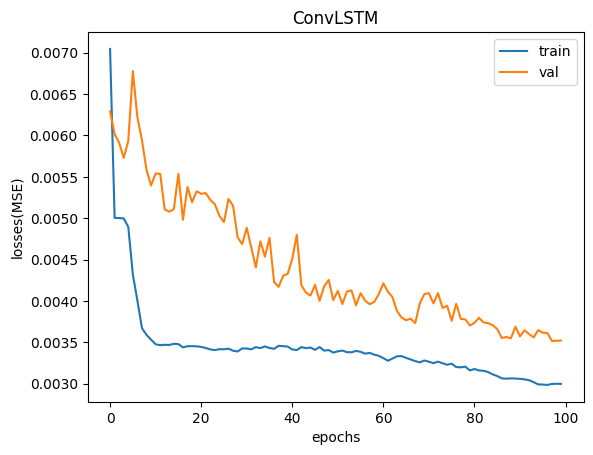

In [10]:
plt.title('ConvLSTM')
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.xlabel('epochs')
plt.ylabel('losses(MSE)')
plt.legend()
plt.show()